Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

# 1. Read the dataset to the python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('iris (1).xls')

In [5]:
df.head(2)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

Checking the basic details

In [6]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Missing values are found in SL,SW,PL

In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.groupby('Classification').describe()

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                           ...     PL         PW                             \
                     mean  ...    75%  max count   mean       std  min  25%   
Classification             ...                                                
Iris-setosa      3.408511  ...  1.600  1.9  50.0  0.244  0.107210  0.1  0.2   
Iris-versicolor  2.781250  ...  4.600  5.1  50.0  1.326  0.197753  1.0  1.2   
Iris-virginica   2.967347  ...  5.825  6.9  50.0  2.026  0.274650  1.4  1.8   

                                
                 50%  75%  max  
Classification                  
Iris-setosa      0.2  0.3  0.6  
Iris-versicolor  1.3  1.5  1.8  
Iris-virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [19]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [16]:
df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [20]:
df.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

Handling missing values

In [22]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

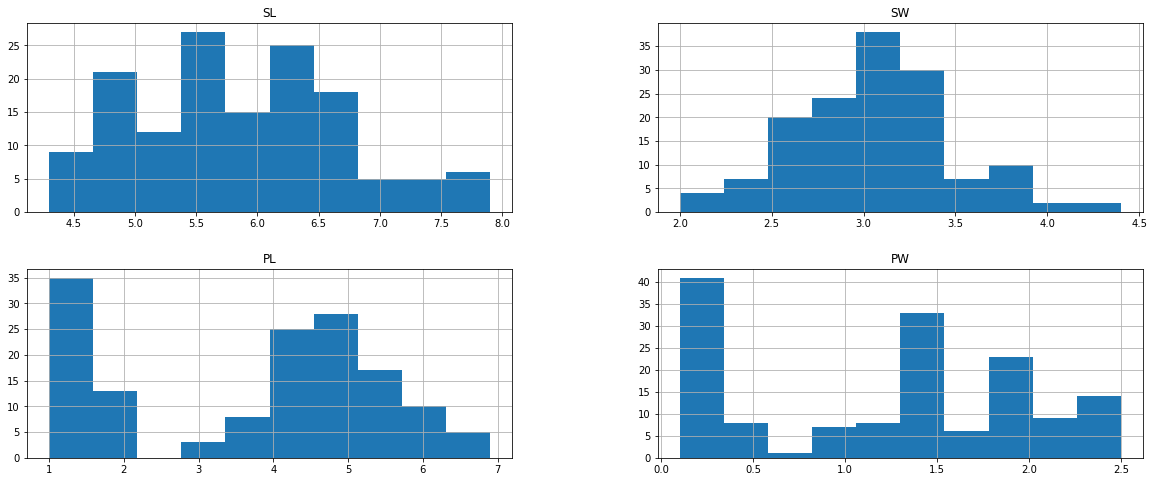

In [23]:
#histograms of features with missing values
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,8))
plt.show()

All three features are skewed in their distribution. Hence median can be used to fill the missing values.

In [24]:
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [25]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling outliers

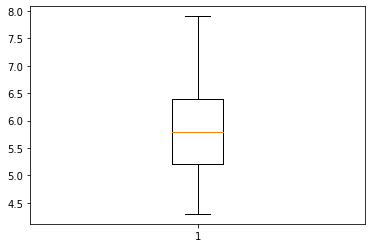

In [26]:
plt.boxplot(df['SL'])
plt.show()

In [28]:
#calculating percentiles
Q1=np.percentile(df['SL'],25,interpolation='midpoint')
Q2=np.percentile(df['SL'],50,interpolation='midpoint')
Q3=np.percentile(df['SL'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',low_lim)

#creating a list of outliers
outlier=[]
for x in df['SL']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  5.2 
Q2 =  5.8 
Q3 =  6.4
IQR =  1.2
Upper limit =  8.2 
Lower limit =  3.4
List of outliers:  []


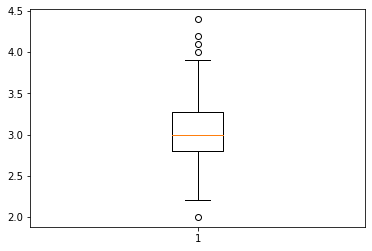

In [30]:
plt.boxplot(df['SW'])
plt.show()

In [32]:
#calculating percentiles
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',low_lim)

#creating a list of outliers
outlier=[]
for x in df['SW']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.25
IQR =  0.45
Upper limit =  3.92 
Lower limit =  2.1249999999999996
List of outliers:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [33]:
#finding index values of outliers
df.loc[(df['SW']>up_lim ) | (df['SW']<low_lim)].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [34]:
#removing the outliers
df.drop([ 14, 15, 32, 33, 60],inplace=True)

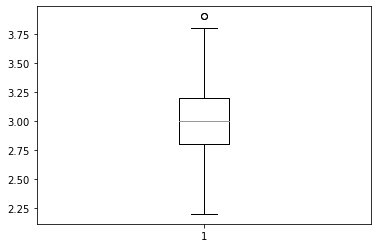

In [35]:
#boxplot of 'SW'
plt.boxplot(df['SW'])
plt.show()

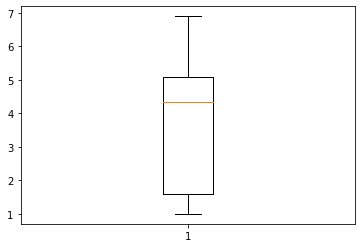

In [36]:
#boxplot of 'PL'
plt.boxplot(df['PL'])
plt.show()

In [37]:
#calculating percentiles
Q1=np.percentile(df['PL'],25,interpolation='midpoint')
Q2=np.percentile(df['PL'],50,interpolation='midpoint')
Q3=np.percentile(df['PL'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',round(low_lim,2))

#creating a list of outliers
outlier=[]
for x in df['PL']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  1.6 
Q2 =  4.35 
Q3 =  5.1
IQR =  3.5
Upper limit =  10.35 
Lower limit =  -3.65
List of outliers:  []


Scaling the model

In [38]:
#dependent variable is stored in y
y=df['Classification']
#independent variable is stored in x
x=df.drop(['Classification'],axis=1)

In [39]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [40]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


# 3. Find out which classification model gives the best result to predict iris
         species.(also do random forest algorithm)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [43]:
#evaluating the performance of the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



KNN MODEL

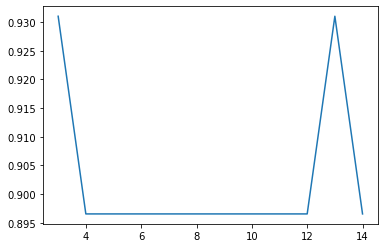

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#to find optimal k value
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

K=13 will give accurate value

In [45]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [46]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



SVM

In [47]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


In [48]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [51]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



RandomForestModel

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [53]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



Out of the six models, Support Vector Machine, Random Forest and Extreme Gradient Boosting gives the highest accuracy of 97%.